# A/B Testing Marketing Promotions

Which promotion was the most effective?

**Scenario:**

A fast food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks

**The description of the data set:**
Our data set consists of 548 entries including:
- MarketId: an inhouse tag used to describe market types, we won't be using it
- AgeOfStores: Age of store in years (1–28). The mean age of a store is 8.5 years.
- LocationID: Unique identifier for store location. Each location is identified by a number. The total number of stores is 137.
- Promotion: One of three promotions that were tested (1, 2, 3). We don’t really know the specifics of each promotion.
- Sales in Thousands: Sales amount for a specific LocationID, Promotion and week. The mean amount of sales are 53.5 thousand dollars.
- Market size: there are three types of market size: small, medium and large.
- Week: One of four weeks when the promotions were run (1–4).

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Import data as a dataframe

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv"

df = pd.read_csv(file_name)
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


### Let's perform exploratory data Analysis 

In [6]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [16]:
# Check for any null values 

df.isnull().sum()


MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [15]:
# Unique values column wise 

df.nunique()

MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64

In [30]:
df_prom = df.groupby("Promotion").sum()
df_prom

,MarketID,LocationID,AgeOfStore,week,SalesInThousands
Promotion,,,,,
1,996,84016,1424,430,9993.03
2,1108,93520,1500,470,8897.93
3,1028,85316,1736,470,10408.52


Text(0.5, 1.0, 'Sales Distribution over the three marketing promotions')

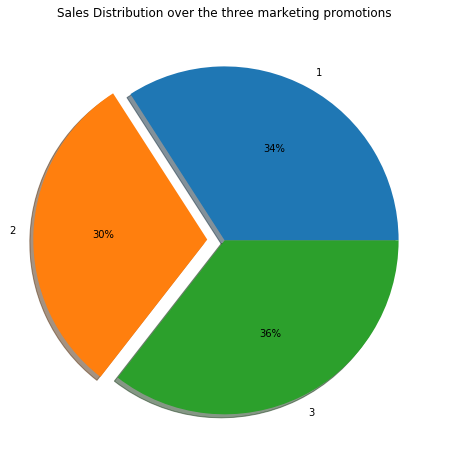

In [39]:
plt.figure(figsize=(8,8))
plt.pie(df_prom["SalesInThousands"], labels= [1,2,3],autopct='%1.0f%%',
                                                                shadow=True,
                                                                explode = (0, 0.1, 0))

plt.title("Sales Distribution over the three marketing promotions")

In [48]:
# Now let's view the promotions for each market size
df.groupby(["Promotion", "MarketSize"]).count()["MarketID"]

Promotion  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

In [79]:
# Using Unstack 

a = df.groupby(["Promotion", "MarketSize"]).count()["MarketID"].unstack("MarketSize")
a

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


In [80]:
# Showing totals in the table

a.loc["Column_Total"] = a.sum(axis = 0, numeric_only= True )
a
a["Row_Total"] = a.sum(axis = 1, numeric_only= True)
a

MarketSize,Large,Medium,Small,Row_Total
Promotion,,,,
1,56,96,20,172
2,64,108,16,188
3,48,116,24,188
Column_Total,168,320,60,548


Text(0, 0.5, 'count')

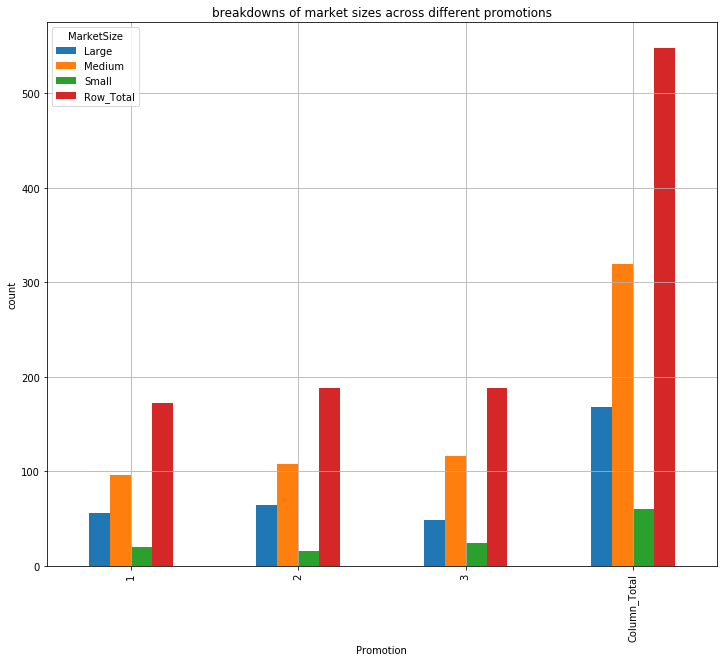

In [102]:
# Show this in a plot

ax = a.plot(kind = 'bar', figsize = (12,10), title = "breakdowns of market sizes across different promotions", grid = True)
ax.set_ylabel("count")

Text(0, 0.5, 'count')

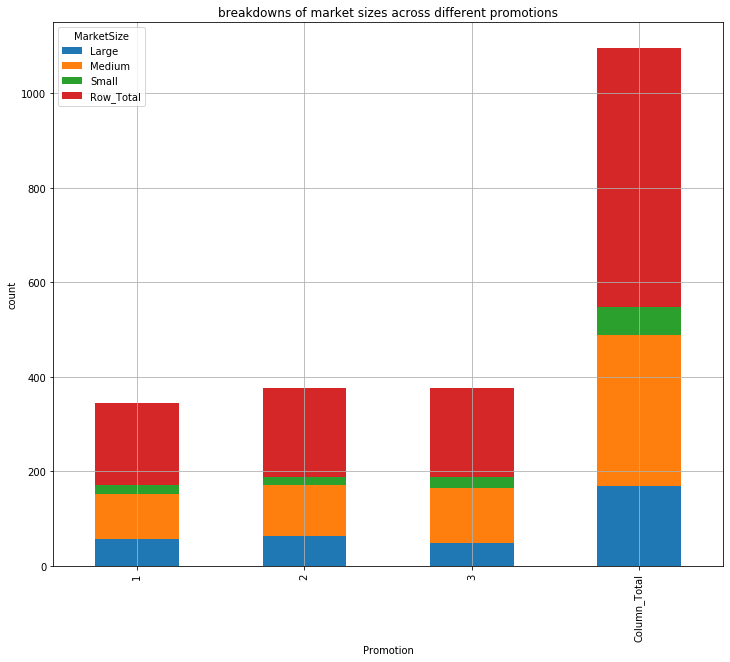

In [103]:
# Show this in a stacked plot

ax = a.plot(kind = 'bar', figsize = (12,10), title = "breakdowns of market sizes across different promotions", grid = True, stacked = True)
ax.set_ylabel("count")

In [115]:
# Age wise distribution of Markets

df.groupby("AgeOfStore").count()

,MarketID,MarketSize,LocationID,Promotion,week,SalesInThousands
AgeOfStore,,,,,,
1,80,80,80,80,80,80
2,20,20,20,20,20,20
3,32,32,32,32,32,32
4,44,44,44,44,44,44
5,44,44,44,44,44,44
6,36,36,36,36,36,36
7,40,40,40,40,40,40
8,40,40,40,40,40,40
9,28,28,28,28,28,28


Text(0.5, 1.0, 'Overall Distributions Store Ages')

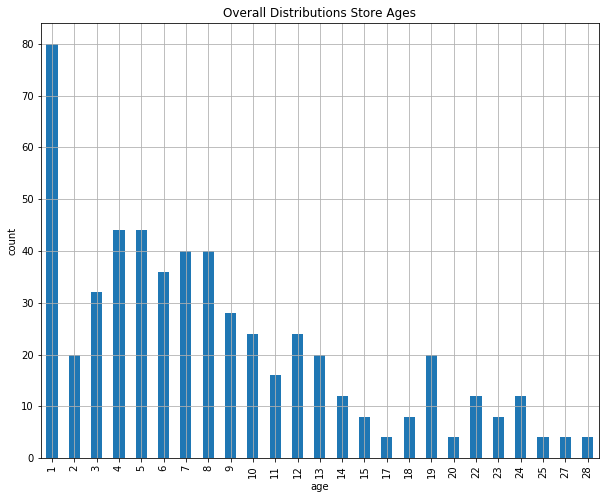

In [113]:
ax = df.groupby("AgeOfStore").count()["MarketSize"].plot(kind = 'bar', figsize = (10,8), grid = True)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('Overall Distributions Store Ages')


In [116]:
# Group by Age of store and Promotion 

df.groupby(["AgeOfStore", "Promotion"]).count()

MarketID  MarketSize  LocationID  week  SalesInThousands
AgeOfStore Promotion                                                          
1          1                24          24          24    24                24
           2                36          36          36    36                36
           3                20          20          20    20                20
2          1                 8           8           8     8                 8
           2                 8           8           8     8                 8
           3                 4           4           4     4                 4
3          1                16          16          16    16                16
           2                12          12          12    12                12
           3                 4           4           4     4                 4
4          1                16          16          16    16                16
           2                12          12          12    12                12
           3                16          16          16    16                16
5          1                 8           8           8     8                 8
           2                12          12          12    12                12
           3                24          24          24    24                24
6          1                20          20          20    20                20
           2                 4           4           4     4                 4
           3                12          12          12    12                12
7          1                 4           4           4     4                 4
           2                24          24          24    24                24
           3                12          12          12    12                12
8          1                12          12          12    12                12
           2                 8           8           8     8                 8
           3                20          20          20    20                20
9          1                 8           8           8     8                 8
           2                12          12          12    12                12
           3                 8           8           8     8                 8
10         2                16          16          16    16                16
           3                 8           8           8     8                 8
11         1                 4           4           4     4                 4
           3                12          12          12    12                12
12         1                12          12          12    12                12
           2                 4           4           4     4                 4
           3                 8           8           8     8                 8
13         1                12          12          12    12                12
           2                 8           8           8     8                 8
14         2                 8           8           8     8                 8
           3                 4           4           4     4                 4
15         1                 4           4           4     4                 4
           2                 4           4           4     4                 4
17         3                 4           4           4     4                 4
18         1                 8           8           8     8                 8
19         1                 4           4           4     4                 4
           2                 8           8           8     8                 8
           3                 8           8           8     8                 8
20         3                 4           4           4     4                 4
22         1                 4           4           4     4                 4
           3                 8           8           8     8                 8
23         2                 4           4           4     4            

Text(0.5, 1.0, 'overall distributions of age of store')

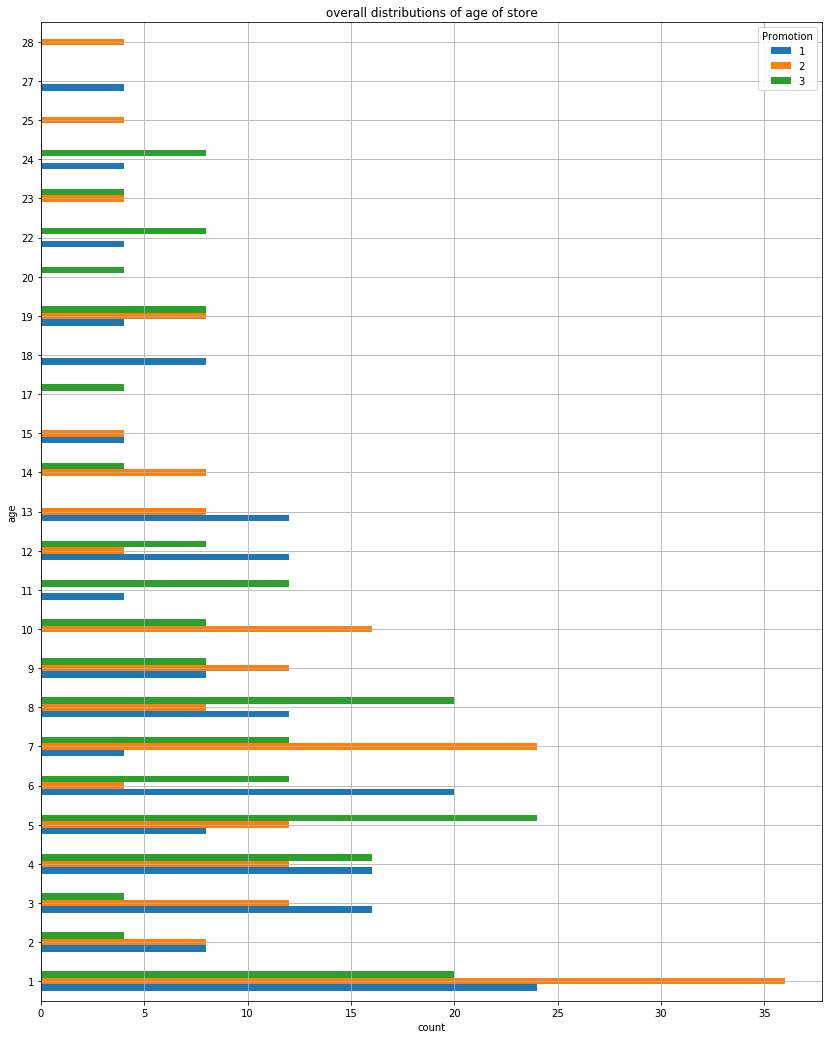

In [123]:
# Visualize this summary

ax = df.groupby(["AgeOfStore", "Promotion"]).count()["MarketID"].unstack("Promotion").plot(kind = 'barh', 
                                                                                          figsize = (14,18),
                                                                                          grid = True)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')


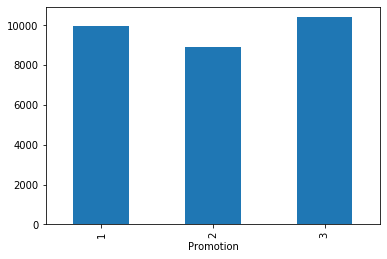

In [133]:
df.groupby("Promotion").sum()["SalesInThousands"].plot(kind = "bar")

In [125]:
df.groupby("Promotion").describe()["AgeOfStore"]

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


This table makes it easy to understand the overall store age distribution from our summary stats.

All test groups have similar age profiles and the average store ages  is ~8 to 9 years old for theese 3 groups.

The majority of the stores are 10–12 years old or even younger.

We can see that the store profiles are similar to each other. 

This indicates that our sample groups are well controlled and the A/B testing results will be meaningful and trustworthy.

# Perform A/B Testing

In [130]:
means = df.groupby("Promotion").mean()["SalesInThousands"]
stds = df.groupby("Promotion").std()["SalesInThousands"]
ns = df.groupby("Promotion").count()["SalesInThousands"]

print(means)
print(stds)
print(ns)


Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64
Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64
Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64


### **T-value**

the t-value measures the degree of difference relative to the variation in our data groups. Large t-values indicate a higher degree of difference between the groups

### **p-value**

p-value meansures the probablity that the results would occur by random chance. Therefore the smaller the p-value is, the more statistically significant difference there will be between the two groups

H0 : Null Hypothesis : There is no statistically significant difference in marketing performances for the two promotion groups

Step 2 : Set a critical value. If t-value is less than the`critical value , don't reject the null hypothesis. Else reject the null hypothesis

Step 3: Use the t table to select the critical value. Degree of freedom (n1-n2-2) = (188-172-2) = (14)

Step 4: Degree of freedom = 14, significance = 0.05 = 2.14 as critical value

In [143]:
# Computing the values using scipy
from scipy import stats

t,p = stats.ttest_ind(np.array(df[df["Promotion"] == 1]["SalesInThousands"]),
                     np.array(df[df["Promotion"] == 2]["SalesInThousands"]),
                     equal_var= False)

print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


# Analysis of P and t-values 

Our **p-value is close to 0** which suggests that there is a good evidence to **Reject the Null hypothesis**. Meaning that there is a statistical difference between the two groups. Our threshold for rejecting the Null hypothesis is usually p-value less than 0.05. 

Out **t-test** shows that the marketing performances for these two groups are significantly different and that promotion group 1 outperforms promotion group 2

## Comparing Promotion 1 vs Promotion 3 in an A/B Test

However, if we run a t-test between the promotion group 1 and promotion group 3, we see different results: 

In [144]:
t, p = stats.ttest_ind(np.array(df[df["Promotion"] == 1]["SalesInThousands"]),
                     np.array(df[df["Promotion"] == 3]["SalesInThousands"]),
                     equal_var= False)

print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 1.5560224307758634
p-value = 0.12059147742229478


## Analysis of p and t-values 

Our **p-value** is 0.12 which is **a lot higher than 0.05** which is past the threshold for statistical significance. Even the t-value is comparatively lower. 

We note that the average sales from promotion group 1 (58.1) is higher than those from promotion group 2 (55.36)

However, our null hypothesis holds statistically significant that there is no significant difference in marketing performances for the two promotion groups

##                                                           **THE END**